In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import optimize
from MCEq.core import MCEqRun
import crflux.models as crf

In [2]:
# Initalize MCEq by creating the user interface object MCEqRun
mceq = MCEqRun(

    # High-energy hadronic interaction model
    interaction_model='SIBYLL23C',

    # cosmic ray flux at the top of the atmosphere
    primary_model = (crf.HillasGaisser2012, 'H3a'),

    # zenith angle
    theta_deg = 0.
)

# Solve the equation system
mceq.solve()

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


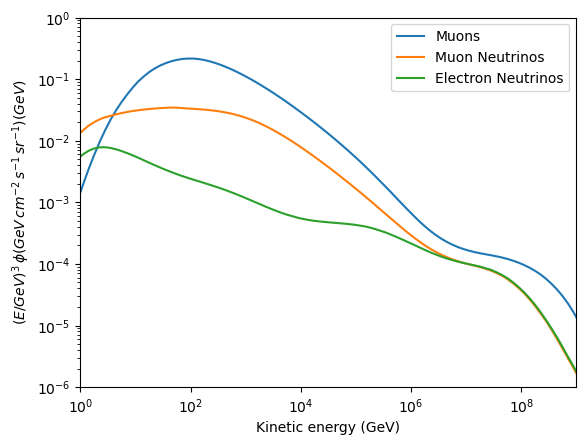

In [10]:
# Obtain the result
# Multiply fluxes be E**mag to resolve the features of the steep spectrum
mag = 3
muon_flux = (mceq.get_solution('mu+', mag) +
             mceq.get_solution('mu-', mag))
numu_flux = (mceq.get_solution('numu', mag) +
             mceq.get_solution('antinumu', mag))
nue_flux = (mceq.get_solution('nue', mag) +
            mceq.get_solution('antinue', mag))
            
# The lines below are for plotting with matplotlib
plt.loglog(mceq.e_grid, muon_flux, label='Muons')
plt.loglog(mceq.e_grid, numu_flux, label='Muon Neutrinos')
plt.loglog(mceq.e_grid, nue_flux, label='Electron Neutrinos')

plt.xlim(1., 1e9)
plt.xlabel('Kinetic energy (GeV)')
plt.ylim(1e-6, 1.)
plt.ylabel(r'$(E/GeV)^3 \, \phi (GeV \, cm^{-2} \, s^{-1} \, sr ^{-1}) (GeV)$')
plt.legend()
plt.show()